Caleb Sellinger: Exploratory Data Analysis Project

# Intro to Jupyter

Author: Caleb Sellinger

7 February 2025

Purpose: Take an exploratory look at iris flower data and suggest possible conclusions.

## Section 1. Imports

Load imports as necessary. Pandas for data manipulation and transformation. Matplotlib and seaborn for plots. And Numpy for calculating trendlines.

In [62]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import numpy as np

## Section 2. Load Data

Loading data into pandas dataframe.

In [63]:
df:pd.DataFrame = sns.load_dataset('iris')
# df.columns
# df.head()

## Section 3. Initial Data Inspection

Uncomment each line one at a time to see how they effect the data frame.

In [64]:
# df.columns
# df.head()
# df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Section 4. Initial Descriptive Statistics

The describe() method shows a statistical summary of the numerical columns in the data frame.

In [65]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Section 5. Initial Data Distribution for Numerical/Categorical Columns

Initial look at data using histogram plot for each column, split by numerical and categorical columns.

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

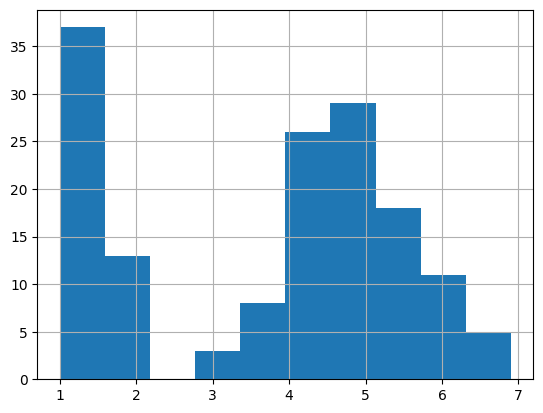

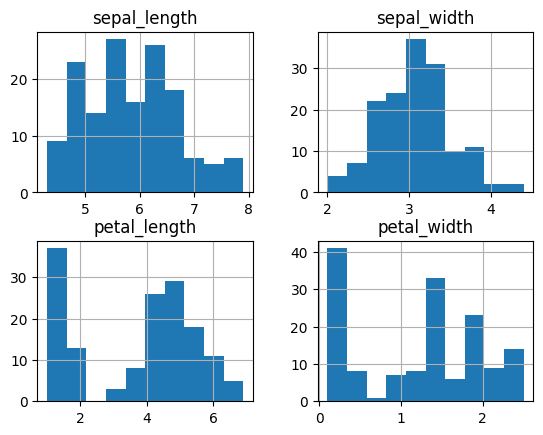

In [66]:
df['petal_length'].hist()

df.hist()

# Not needed while running in Jupyter Notebook
# mp.show()

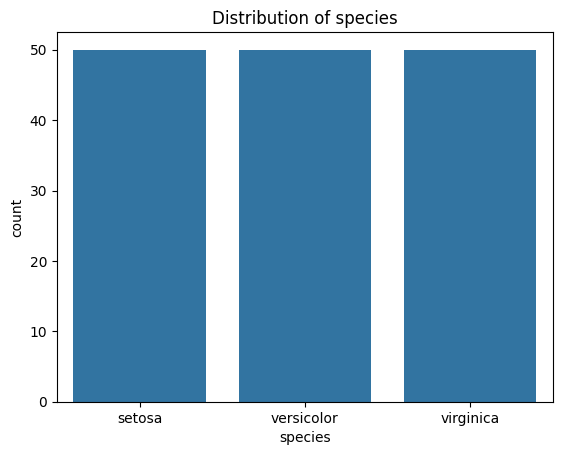

In [67]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    mp.title(f'Distribution of {col}')


### Findings/Observations

It seems that petal length and width is rather small on most samples, while the sepals are consistent across. This could suggest the data was taken in late winter or early spring, before the petals had time to bloom.

## Section 6. Initial Data Transformation and Feature Engineering

In [68]:
# Petal Area
df['Petal Area'] = df['petal_length'] * df['petal_width']

# Creates a new categorical column Size based on Petal Area
df['Size'] = df['Petal Area'].apply(lambda a : "Large" if a > 5.79 else "Small")

df.rename(columns={
    'sepal_length':'Sepal Length',
    'sepal_width':'Sepal Width',
    'petal_length':'Petal Length',
    'petal_width':'Petal Width',
    'species':'Species',
    })

# show first 5 rows
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,Petal Area,Size
0,5.1,3.5,1.4,0.2,setosa,0.28,Small
1,4.9,3.0,1.4,0.2,setosa,0.28,Small
2,4.7,3.2,1.3,0.2,setosa,0.26,Small
3,4.6,3.1,1.5,0.2,setosa,0.30,Small
4,5.0,3.6,1.4,0.2,setosa,0.28,Small
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96,Large
146,6.3,2.5,5.0,1.9,virginica,9.50,Large
147,6.5,3.0,5.2,2.0,virginica,10.40,Large
148,6.2,3.4,5.4,2.3,virginica,12.42,Large


## Section 7. Initial Visualizations

Text(0.5, 1.0, 'Iris Data')

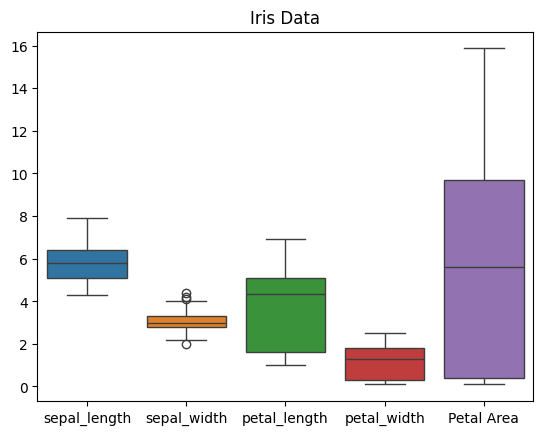

In [69]:
plot = sns.boxplot(df)
plot.set_title("Iris Data")

All data in data frame put into a box plot. Sepal length and width are consistent across all samples and petal length and width varies, mostly on the smaller side, suggesting no or partial bloom.

Text(0, 0.5, 'Petal Area')

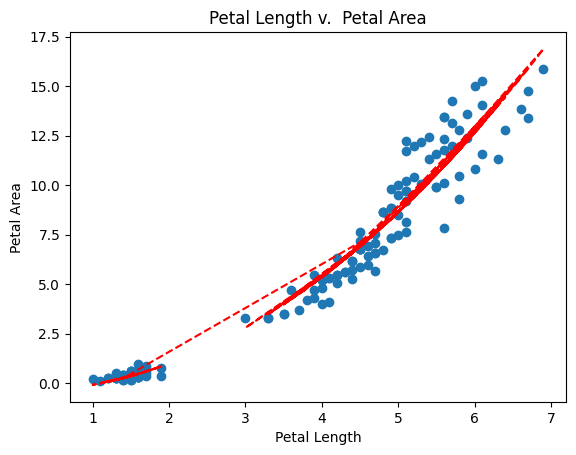

In [70]:
x = df["petal_length"]
y = df["Petal Area"]
mp.scatter(x, y)

# trendline
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
mp.plot(x, p(x), "r--")

mp.title("Petal Length v.  Petal Area")
mp.xlabel("Petal Length")
mp.ylabel("Petal Area")

Scatter plot of petal length to petal area. Petal area seems to scale exponentially to petal length.

Text(0, 0.5, 'Petal Width')

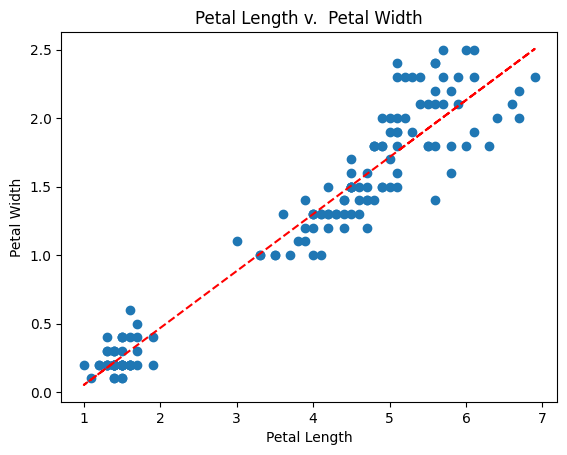

In [71]:
x1 = df["petal_length"]
y1 = df["petal_width"]
mp.scatter(x1, y1)

# trendline
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
mp.plot(x, p(x), "r--")

mp.title("Petal Length v.  Petal Width")
mp.xlabel("Petal Length")
mp.ylabel("Petal Width")

Scatter plot of petal length v. width. Petal length seems to scale linearly to width.

## Section 8. Initial Insights

There are 150 samples and from the plots above, we can conclude that the data was most likely collected during late winter or early spring. The sepal width and length consistency suggests that these are adult samples with buds that just bloomed or are nearly blooming, according to the rather small and inconsistant petal length and width.